## Analisa Data Fantasy Premier League 2024-2025

### Pendahuluan 
Analisis data Fantasy Premier League (FPL) bertujuan untuk mengidentifikasi fitur-fitur pemain yang paling berkontribusi terhadap perolehan poin dan value pemain. Dengan pemahaman yang lebih baik tentang faktor-faktor ini, kita dapat merancang model prediksi untuk merumuskan line-up tim yang optimal, memaksimalkan perolehan poin sesuai dengan batasan budget.

### Goals

- Identifikasi fitur penting yang mempunyai korelasi kuat dengan perolehan poin.
- Optimasi line-up dengan mempertimbangkan batasan budget dan kombinasi pemain yang seimbang.

### Libraries and Packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sql_server import engine

from scipy import stats

### Data
Data berasal dari API resmi Fantasy Premier League, yang berisi bermacam info seperti; nama pemain, team, gol, poin pemain, dan lainnya, yang ditarik dengan python dan kemudian dibersihkan dan ditransformasi, kemudian disimpan ke dalam database SQL Server.
Untuk analisa data ini data tersebut akan ditarik dari SQL Server ke dataframe pandas.

#### Load Datasets

In [2]:
df = pd.read_sql_query('''\
                       select * from analisa_data
                       where gameweek = 24
                       ''', engine)

In [3]:
df.head()

,gameweek,web_name,first_name,team,dreamteam,result_points,team_strength,opponent_strength,now_cost,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,value_form,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,influence,creativity,threat,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,starts_per_90,clean_sheets_per_90,position,value
0,24,Arteta,Mikel,Arsenal,False,9,1335,1095,15,9.0,9,0,0.0,0,0,0,0,0,6.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Manager,6.0
1,24,Bailey,Leon,Aston Villa,False,3,1110,1100,62,3.0,43,2,2.3,983,1,2,2,0,0.5,15,0,0,0,2,0,133.0,228.3,255.0,13,1.39,2.85,4.24,11.46,0.13,0.0,0.26,0.39,1.05,1.37,1.19,0.18,Midfielder,6.9
2,24,Barkley,Ross,Aston Villa,False,0,1110,1100,52,2.2,40,5,2.5,544,3,1,1,0,0.4,9,0,0,0,3,0,203.4,115.5,185.0,3,1.68,0.41,2.09,5.36,0.28,0.0,0.07,0.35,0.89,1.49,0.50,0.17,Midfielder,7.7
3,24,Buendia,Emiliano,Aston Villa,False,1,1110,1100,51,0.6,11,0,0.9,89,0,0,0,0,0.1,2,0,0,0,1,0,16.4,23.2,16.0,0,0.65,0.03,0.68,2.27,0.66,0.0,0.03,0.69,2.30,2.02,0.00,0.00,Midfielder,2.2
4,24,Cash,Matty,Aston Villa,False,2,1110,1100,44,3.0,38,1,2.4,1258,1,1,2,0,0.7,17,0,0,0,5,0,233.4,120.0,98.0,15,0.22,0.96,1.18,17.63,0.02,0.0,0.07,0.09,1.26,1.22,1.07,0.14,Defender,8.6


In [4]:
df.shape

(529, 43)

In [5]:
cols = ['form', 'points_per_game', 'now_cost',  'value_form', 'influence', 'creativity', 'threat', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'expected_goals_conceded']
df[cols] = df[cols].astype(float)
df['dreamteam'] = df['dreamteam'].astype(int)

In [6]:
df.dtypes

gameweek                               int64
web_name                              object
first_name                            object
team                                  object
dreamteam                              int32
result_points                          int64
team_strength                          int64
opponent_strength                      int64
now_cost                             float64
form                                 float64
total_points                           int64
bonus                                  int64
points_per_game                      float64
minutes                                int64
goals_scored                           int64
assists                                int64
clean_sheets                           int64
saves                                  int64
value_form                           float64
goals_conceded                         int64
own_goals                              int64
penalties_saved                        int64
penalties_

In [7]:
df = df[df['position'] != 'Manager']
df = df[df['value'] != 0]

In [8]:
df.shape

(513, 43)

In [9]:
df.isnull().any()

gameweek                             False
web_name                             False
first_name                           False
team                                 False
dreamteam                            False
result_points                        False
team_strength                        False
opponent_strength                    False
now_cost                             False
form                                 False
total_points                         False
bonus                                False
points_per_game                      False
minutes                              False
goals_scored                         False
assists                              False
clean_sheets                         False
saves                                False
value_form                           False
goals_conceded                       False
own_goals                            False
penalties_saved                      False
penalties_missed                     False
yellow_card

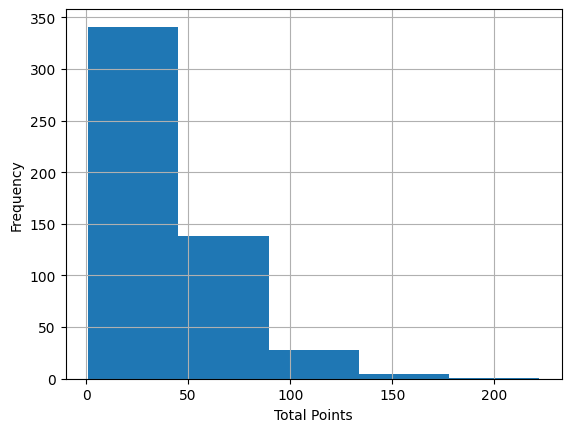

In [10]:
hist = df['total_points'].hist(bins=5)

plt.xlabel('Total Points') 
plt.ylabel('Frequency') 
  
# Display the histogram 
plt.show() 

In [11]:
data = df[df['starts'] > 11]

In [12]:
data[['dreamteam', 'result_points', 'value_form', 'now_cost', 'points_per_game', 'total_points', 'minutes', 'form', 'influence', 'creativity', 'threat', 'goals_scored', 'assists', 'clean_sheets', 'saves', 'goals_conceded', 'own_goals', 'yellow_cards', 'red_cards', 'starts', 'value']].corr()

,dreamteam,result_points,value_form,now_cost,points_per_game,total_points,minutes,form,influence,creativity,threat,goals_scored,assists,clean_sheets,saves,goals_conceded,own_goals,yellow_cards,red_cards,starts,value
dreamteam,1.000000,0.287342,0.223582,0.492324,0.537855,0.570507,0.237131,0.401749,0.473613,0.190282,0.362581,0.527478,0.215006,0.299776,0.013921,-0.010581,-0.047540,-0.082922,-0.065832,0.258634,0.321226
result_points,0.287342,1.000000,0.533295,0.288726,0.363969,0.395645,0.187870,0.580370,0.338964,0.121029,0.280737,0.337773,0.155140,0.323992,-0.013733,-0.087949,-0.120039,0.001384,-0.051733,0.188271,0.324744
value_form,0.223582,0.533295,1.000000,0.131377,0.398764,0.482292,0.361940,0.912875,0.377297,0.209248,0.235134,0.313376,0.220726,0.464026,-0.021401,-0.057761,-0.004369,0.035511,-0.067481,0.370861,0.619530
now_cost,0.492324,0.288726,0.131377,1.000000,0.754015,0.736723,0.122298,0.457296,0.453371,0.532061,0.786017,0.774378,0.566701,0.316722,-0.143535,-0.179391,-0.076310,-0.228341,0.042710,0.160511,0.186250
points_per_game,0.537855,0.363969,0.398764,0.754015,1.000000,0.950392,0.316237,0.585358,0.687390,0.469075,0.729636,0.797523,0.635455,0.537830,0.041012,-0.148121,-0.096651,-0.251618,-0.029701,0.343845,0.699409
total_points,0.570507,0.395645,0.482292,0.736723,0.950392,1.000000,0.495764,0.655951,0.756259,0.512678,0.751356,0.814264,0.626561,0.582519,0.017303,-0.014484,-0.116999,-0.185651,-0.020158,0.520434,0.782834
minutes,0.237131,0.187870,0.361940,0.122298,0.316237,0.495764,1.000000,0.338731,0.696503,0.186838,0.149146,0.170871,0.142681,0.406890,0.183423,0.528008,-0.041269,0.062487,0.037562,0.971882,0.629934
form,0.401749,0.580370,0.912875,0.457296,0.585358,0.655951,0.338731,1.000000,0.477720,0.355377,0.475895,0.563968,0.348089,0.469541,-0.067236,-0.087398,-0.042140,-0.059183,-0.042091,0.358112,0.569794
influence,0.473613,0.338964,0.377297,0.453371,0.687390,0.756259,0.696503,0.477720,1.000000,0.284327,0.427187,0.535568,0.399725,0.329411,0.309463,0.330055,0.001460,-0.131544,-0.015948,0.668626,0.669446
creativity,0.190282,0.121029,0.209248,0.532061,0.469075,0.512678,0.186838,0.355377,0.284327,1.000000,0.507022,0.435482,0.731640,0.242554,-0.394304,-0.019887,-0.137280,-0.004703,0.079061,0.223892,0.272120


<Axes: title={'center': 'starts vs total points'}, xlabel='starts', ylabel='total_points'>

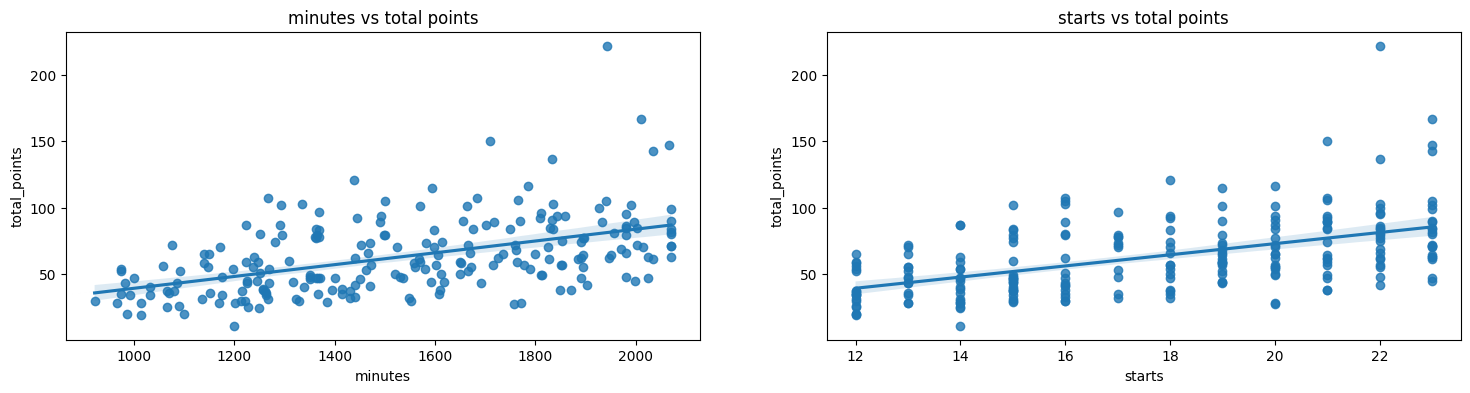

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 4))

ax1.set_title('minutes vs total points')
sns.regplot(x="minutes", y="total_points", data=data, ax=ax1)

ax2.set_title('starts vs total points')
sns.regplot(x='starts', y='total_points', data=data, ax=ax2)

<Axes: title={'center': 'goals scored vs points_per_game'}, xlabel='goals_scored', ylabel='points_per_game'>

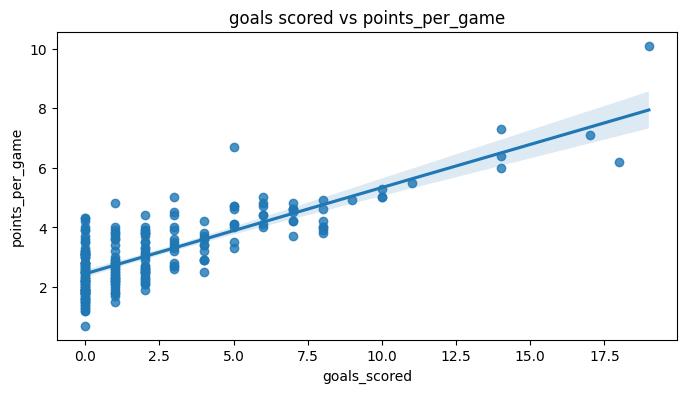

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.set_title('goals scored vs points_per_game')
sns.regplot(x="goals_scored", y="points_per_game", data=data, ax=ax1)


<Axes: title={'center': 'threat vs goals_scored'}, xlabel='threat', ylabel='goals_scored'>

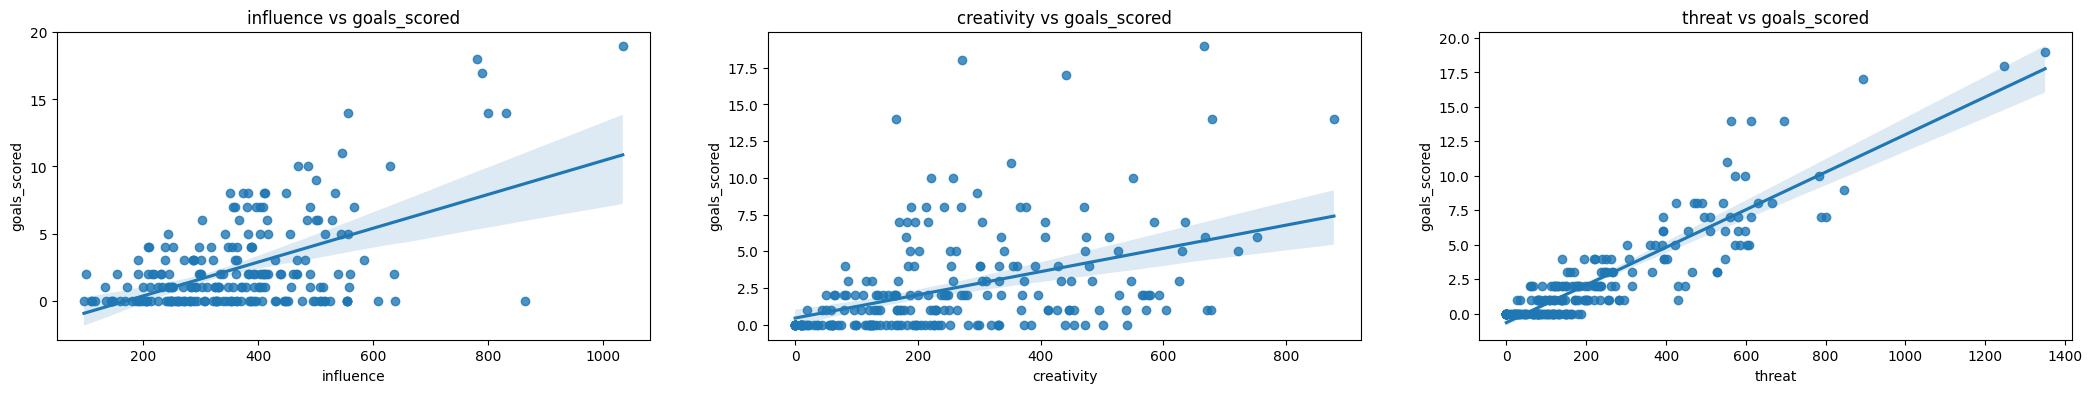

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))

ax1.set_title('influence vs goals_scored')
sns.regplot(x="influence", y="goals_scored", data=data, ax=ax1)

ax2.set_title('creativity vs goals_scored')
sns.regplot(x="creativity", y="goals_scored", data=data, ax=ax2)

ax3.set_title('threat vs goals_scored')
sns.regplot(x="threat", y="goals_scored", data=data, ax=ax3)

<Axes: title={'center': 'assists vs points_per_game'}, xlabel='assists', ylabel='points_per_game'>

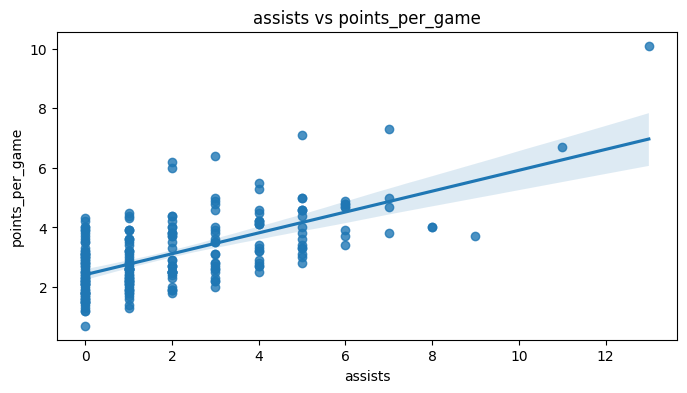

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.set_title('assists vs points_per_game')
sns.regplot(x="assists", y="points_per_game", data=data, ax=ax1)

<Axes: title={'center': 'threat vs assists'}, xlabel='threat', ylabel='assists'>

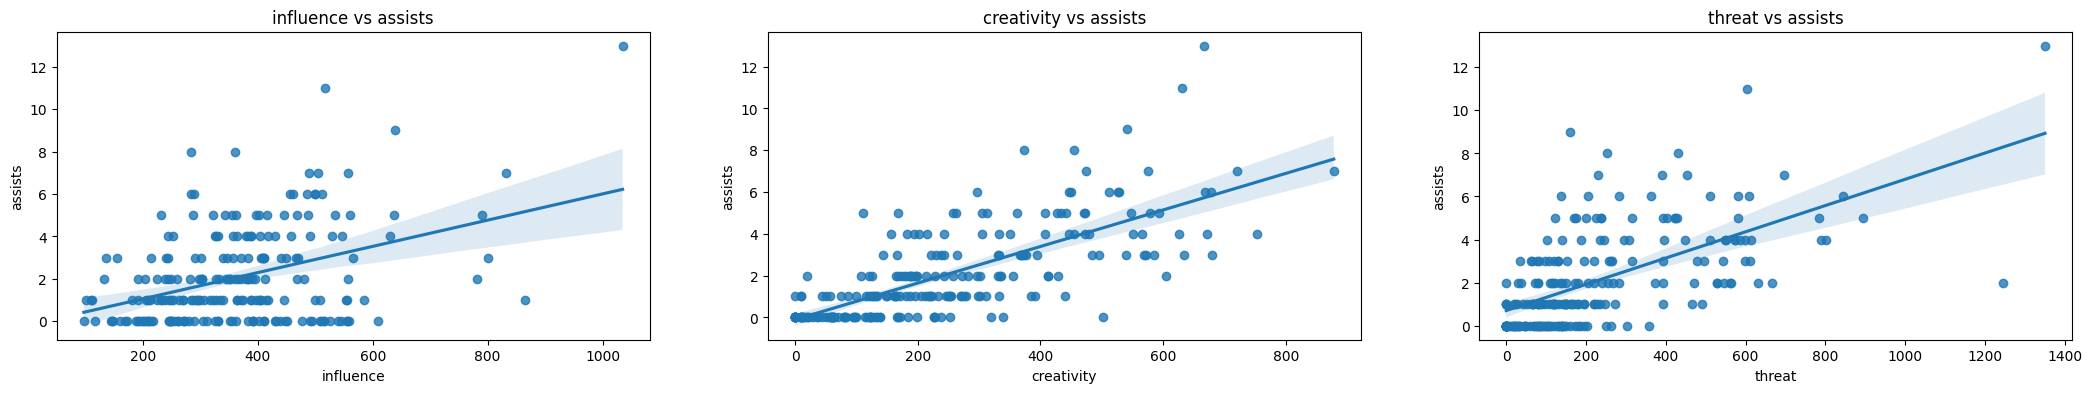

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))

ax1.set_title('influence vs assists')
sns.regplot(x="influence", y="assists", data=data, ax=ax1)

ax2.set_title('creativity vs assists')
sns.regplot(x="creativity", y="assists", data=data, ax=ax2)

ax3.set_title('threat vs assists')
sns.regplot(x="threat", y="assists", data=data, ax=ax3)

In [18]:
data[data['influence'] >= 600][['position', 'points_per_game']].groupby(['position'], as_index=False)['points_per_game'].mean()

,position,points_per_game
0,Defender,3.400000
1,Forward,6.200000
2,Goalkeeper,3.650000
3,Midfielder,7.933333


In [19]:
data[data['creativity'] >= 600][['position', 'points_per_game']].groupby(['position'], as_index=False)['points_per_game'].mean()

,position,points_per_game
0,Defender,3.40
1,Midfielder,5.48


In [20]:
data[data['threat'] >= 600][['position', 'points_per_game']].groupby(['position'], as_index=False)['points_per_game'].mean()

,position,points_per_game
0,Forward,5.233333
1,Midfielder,6.062500


<Axes: title={'center': 'Midfielder - clean_sheets vs points_per_game'}, xlabel='clean_sheets', ylabel='points_per_game'>

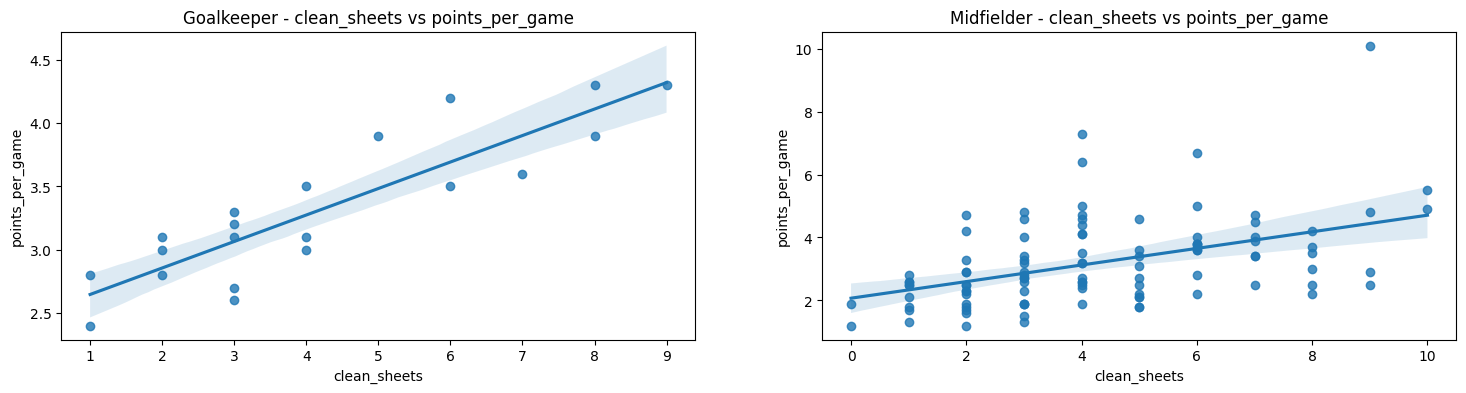

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

ax1.set_title('Goalkeeper - clean_sheets vs points_per_game')
sns.regplot(x="clean_sheets", y="points_per_game", data=data[data['position'] == 'Goalkeeper'], ax=ax1)

ax2.set_title('Midfielder - clean_sheets vs points_per_game')
sns.regplot(x="clean_sheets", y="points_per_game", data=data[data['position'] == 'Midfielder'], ax=ax2)

<Axes: title={'center': 'red cards vs total_points'}, xlabel='red_cards', ylabel='total_points'>

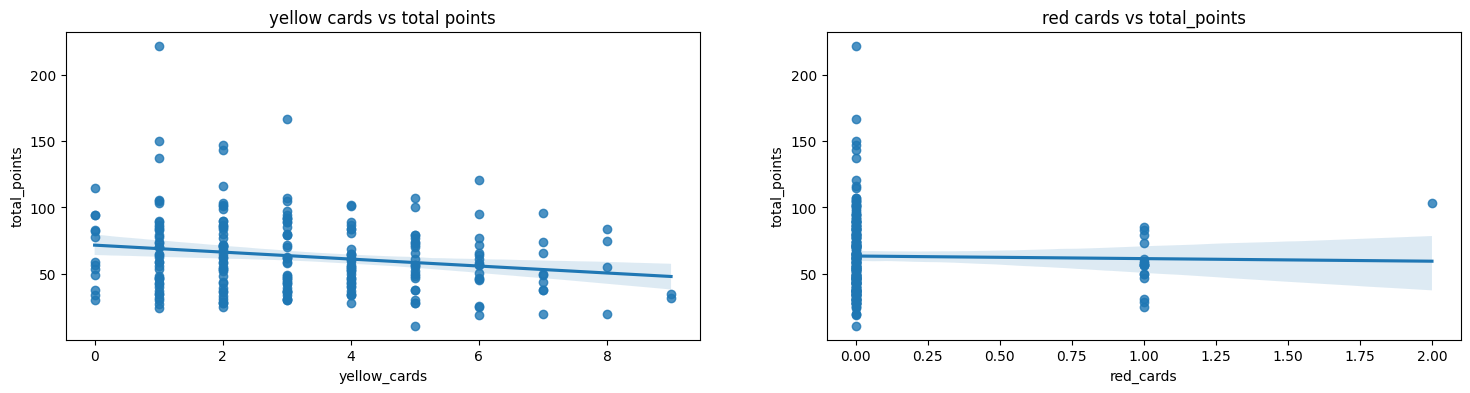

In [22]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 4))

ax1.set_title('yellow cards vs total points')
sns.regplot(x="yellow_cards", y="total_points", data=data, ax=ax1)

ax2.set_title('red cards vs total_points')
sns.regplot(x="red_cards", y="total_points", data=data, ax=ax2)

<Axes: title={'center': 'result_points vs dreamteam'}, xlabel='dreamteam', ylabel='result_points'>

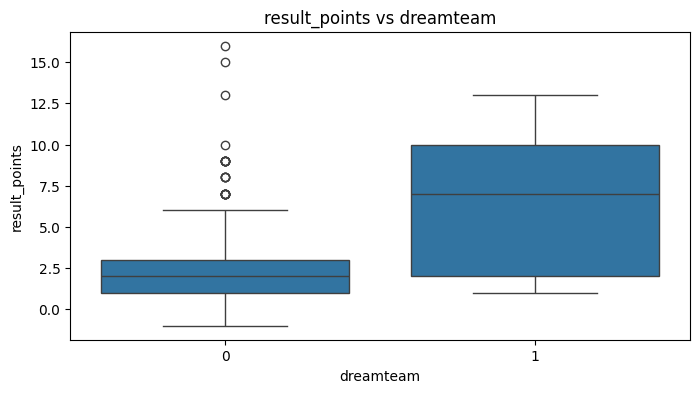

In [23]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.set_title('result_points vs dreamteam')
sns.boxplot(x="dreamteam", y="result_points", data=data, ax=ax1)

In [24]:
data.loc[:, 'now_cost'] = data['now_cost'] / 10

<Axes: title={'center': 'position vs points_per_game'}, xlabel='position', ylabel='points_per_game'>

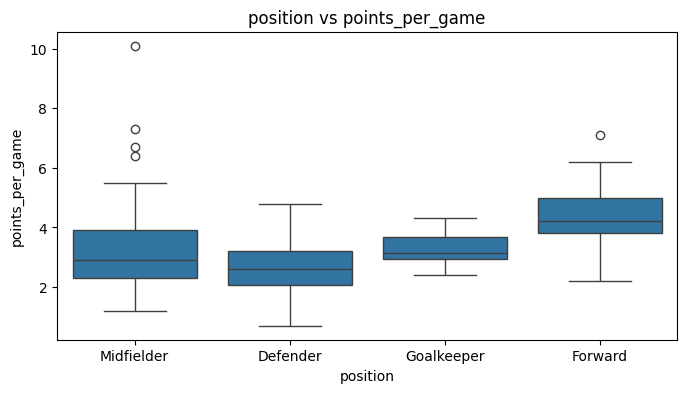

In [77]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.set_title('position vs points_per_game')
sns.boxplot(x="position", y="points_per_game", data=data, ax=ax1)

<Axes: xlabel='team', ylabel='value'>

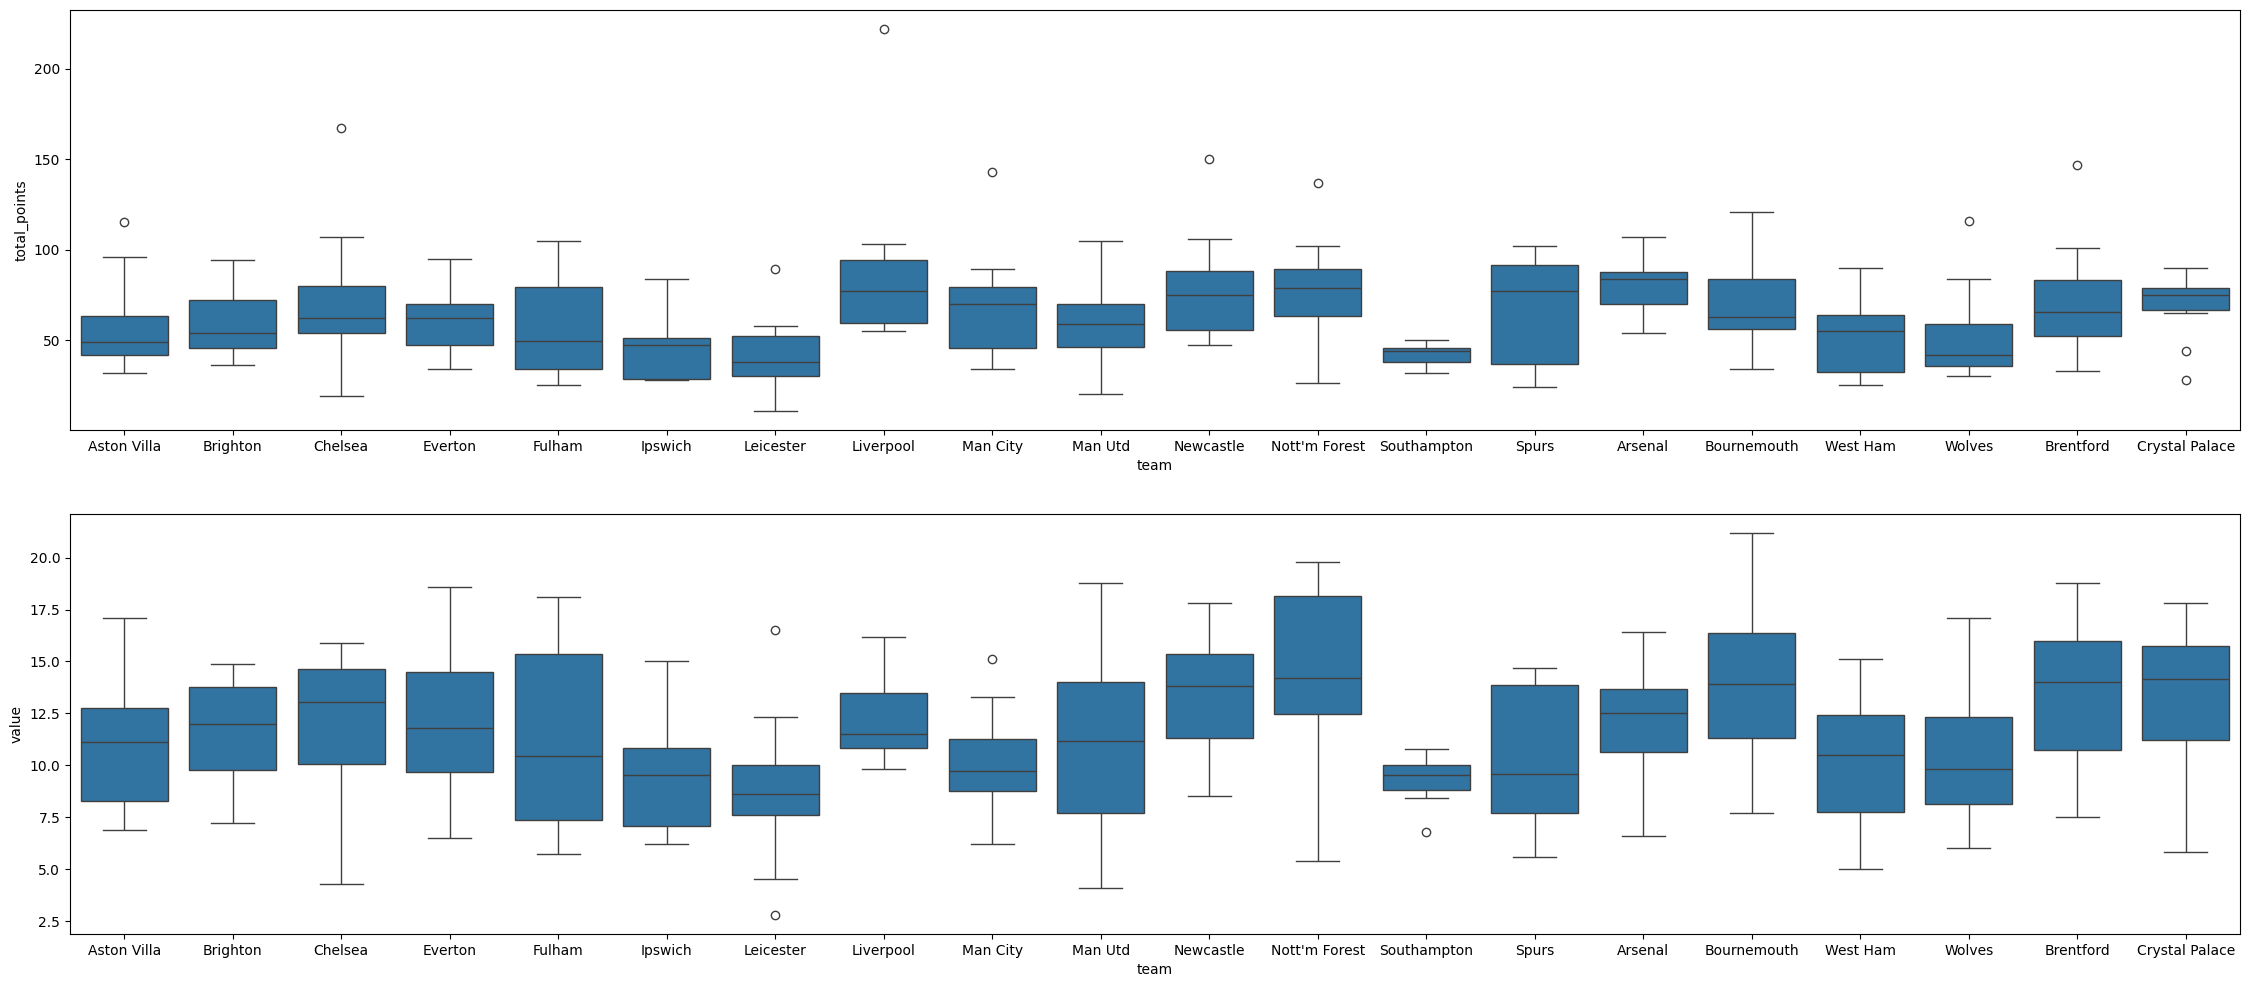

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(28, 12))

# ax1.set_title('team vs total_points')
sns.boxplot(x="team", y="total_points", data=data, ax=ax1)

# ax2.set_title('team vs value')
sns.boxplot(x="team", y="value", data=data, ax=ax2)

In [27]:
data.describe()

,gameweek,dreamteam,result_points,team_strength,opponent_strength,now_cost,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,value_form,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,influence,creativity,threat,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,starts_per_90,clean_sheets_per_90,value
count,223.0,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,24.0,0.049327,2.645740,1167.623318,1166.121076,5.418386,2.648879,63.251121,5.511211,3.142152,1539.690583,2.426009,2.076233,4.304933,5.215247,0.479372,24.852018,0.049327,0.031390,0.031390,3.188341,0.085202,364.627803,249.521076,225.130045,17.717489,2.383318,1.545157,3.928206,24.560897,0.139193,0.283498,0.091031,0.230224,1.443812,1.460404,1.038610,0.249776,11.489238
std,0.0,0.217038,3.026172,78.939775,77.952970,1.445862,2.002473,28.566182,5.877780,1.232342,317.744952,3.396162,2.235770,2.398634,17.342037,0.318110,8.575609,0.236885,0.198874,0.174762,2.020269,0.295470,144.466367,186.946368,223.386923,3.539482,2.915738,1.356281,3.677072,7.880396,0.156799,0.929554,0.079578,0.201294,0.384753,0.436288,0.057047,0.129470,3.638739
min,24.0,0.000000,-1.000000,1055.000000,1055.000000,3.900000,-0.200000,11.000000,0.000000,0.700000,922.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.200000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,9.470000,0.000000,0.000000,0.000000,0.000000,0.680000,0.690000,0.880000,0.000000,2.800000
25%,24.0,0.000000,1.000000,1110.000000,1110.000000,4.500000,1.200000,43.000000,1.500000,2.300000,1266.000000,0.000000,0.000000,2.000000,0.000000,0.300000,19.000000,0.000000,0.000000,0.000000,2.000000,0.000000,257.600000,114.300000,78.500000,15.000000,0.540000,0.500000,1.510000,18.405000,0.030000,0.000000,0.030000,0.080000,1.180000,1.170000,1.000000,0.150000,8.700000
50%,24.0,0.000000,2.000000,1150.000000,1150.000000,5.000000,2.500000,59.000000,4.000000,2.900000,1537.000000,1.000000,1.000000,4.000000,0.000000,0.500000,24.000000,0.000000,0.000000,0.000000,3.000000,0.000000,356.600000,213.500000,149.000000,18.000000,1.360000,1.150000,2.730000,24.050000,0.080000,0.000000,0.070000,0.160000,1.370000,1.350000,1.030000,0.220000,11.200000
75%,24.0,0.000000,3.000000,1222.500000,1220.000000,5.650000,3.800000,79.500000,8.000000,3.900000,1825.500000,3.000000,3.000000,6.000000,0.000000,0.700000,30.000000,0.000000,0.000000,0.000000,4.500000,0.000000,445.700000,367.900000,298.000000,21.000000,3.235000,2.185000,5.810000,29.155000,0.205000,0.000000,0.135000,0.350000,1.670000,1.765000,1.070000,0.360000,14.200000
max,24.0,1.000000,16.000000,1355.000000,1355.000000,14.700000,12.200000,222.000000,36.000000,10.100000,2070.000000,19.000000,13.000000,10.000000,105.000000,2.000000,51.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1035.000000,877.900000,1350.000000,23.000000,17.770000,6.410000,22.070000,52.370000,0.790000,4.690000,0.400000,1.020000,2.660000,2.580000,1.240000,0.670000,21.200000


In [28]:
data['position'].describe()

count            223
unique             4
top       Midfielder
freq             101
Name: position, dtype: object

In [57]:
avg_cost_points_position = data.groupby(['position'])[['now_cost', 'total_points']].mean().rename(columns={'now_cost': 'avg_cost', 'total_points': 'avg_points'}).reset_index()
avg_cost_points_position['points_per_millions'] = (avg_cost_points_position['avg_points'] / avg_cost_points_position['avg_cost']) 
avg_cost_points_position

,position,avg_cost,avg_points,points_per_millions
0,Defender,4.698750,53.437500,11.372706
1,Forward,6.940909,91.454545,13.176162
2,Goalkeeper,4.765000,62.550000,13.126967
3,Midfielder,5.786139,65.019802,11.237166


[Text(0, 0, '11.3727'),
 Text(0, 0, '13.1762'),
 Text(0, 0, '13.127'),
 Text(0, 0, '11.2372')]

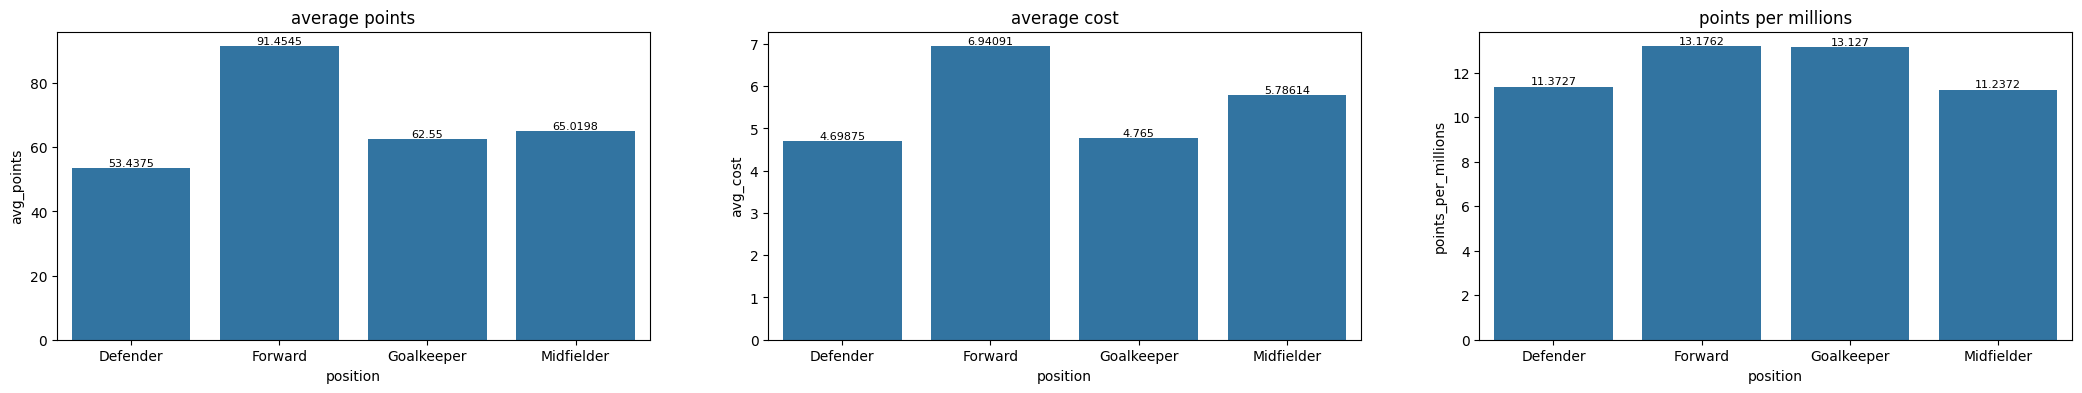

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))

ax1.set_title('average points')
sns.barplot(x="position", y="avg_points", data=avg_cost_points_position, ax=ax1)
ax1.bar_label(ax1.containers[0], fontsize=8)

ax2.set_title('average cost')
sns.barplot(x="position", y="avg_cost", data=avg_cost_points_position, ax=ax2)
ax2.bar_label(ax2.containers[0], fontsize=8)

ax3.set_title('points per millions')
sns.barplot(x="position", y="points_per_millions", data=avg_cost_points_position, ax=ax3)
ax3.bar_label(ax3.containers[0], fontsize=8)

Dari charts di atas formasi yang optimal adalah 3-4-3, agar dapat memaksimalkan points per millions pada posisi forward dan mengurangi jumlah defender yang point per millions-nya rendah.

In [58]:
avg_cost_points_position['players'] = [4, 4, 2, 5]

In [ ]:
total_budget = 100
n = 15

sum_points_per_millions = avg_cost_points_position['points_per_millions'].sum()
avg_cost_points_position['budget'] = (1 / n * total_budget) * (avg_cost_points_position['points_per_millions'] / sum_points_per_millions) / 0.25 * avg_cost_points_position['players']

,position,avg_cost,avg_points,points_per_millions,players,budget
0,Defender,4.698750,53.437500,11.372706,4,24.800943
1,Forward,6.940909,91.454545,13.176162,4,28.733819
2,Goalkeeper,4.765000,62.550000,13.126967,2,14.313269
3,Midfielder,5.786139,65.019802,11.237166,5,30.631709


In [33]:
data.loc[:, 'points_per_mills'] = data.loc[:, 'total_points'] / data.loc[:, 'now_cost']

C:\Users\kakaf\AppData\Local\Temp\ipykernel_344\120470964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'points_per_mills'] = data.loc[:, 'total_points'] / data.loc[:, 'now_cost']


In [34]:
grouped_data = data[['team', 'position', 'points_per_mills']].groupby(['team', 'position'], as_index=False)[['points_per_mills']].mean()
pivoted_data = grouped_data.pivot(index='position', columns='team')
pivoted_data

points_per_mills                                                \
team                Arsenal Aston Villa Bournemouth  Brentford   Brighton   
position                                                                    
Defender          13.647273   10.217509   13.745362  10.604788  10.345085   
Forward           10.769231   12.921348   13.928571  16.031746  13.909091   
Goalkeeper        16.363636   12.600000   13.777778  15.909091  13.777778   
Midfielder        10.822481   10.463454   14.378978  14.139911  11.461531   

                                                                       \
team          Chelsea Crystal Palace    Everton     Fulham    Ipswich   
position                                                                
Defender     9.316762      15.665006  13.754323   9.721823   8.287102   
Forward     13.717949      12.162162  12.008418  16.428571  15.000000   
Goalkeeper  15.744681      17.777778  18.627451  14.200000  10.909091   
Midfielder  13.348994       9.892024   9.308869  11.359023   8.511314   

                                                                   \
team        Leicester  Liverpool   Man City    Man Utd  Newcastle   
position                                                            
Defender     6.628205  12.121459  10.031843  12.678192  13.849673   
Forward     16.481481  11.447368   9.727891   6.231884  15.789474   
Goalkeeper   8.636364  10.727273   9.245283  16.400000   9.795918   
Midfielder   8.967335  12.599729  10.295699   9.840764  12.886478   

                                                                       
team       Nott'm Forest Southampton      Spurs   West Ham     Wolves  
position                                                               
Defender       16.634900    9.364826   8.672961  10.982881   8.982308  
Forward        19.295775    8.823529  11.216216        NaN  16.453940  
Goalkeeper     19.800000   10.454545   7.708333   8.780488   9.767442  
Midfielder     11.452562    9.100087  12.192931   9.780960   9.141440

C:\Users\kakaf\AppData\Local\Temp\ipykernel_344\4025184087.py:19: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im)


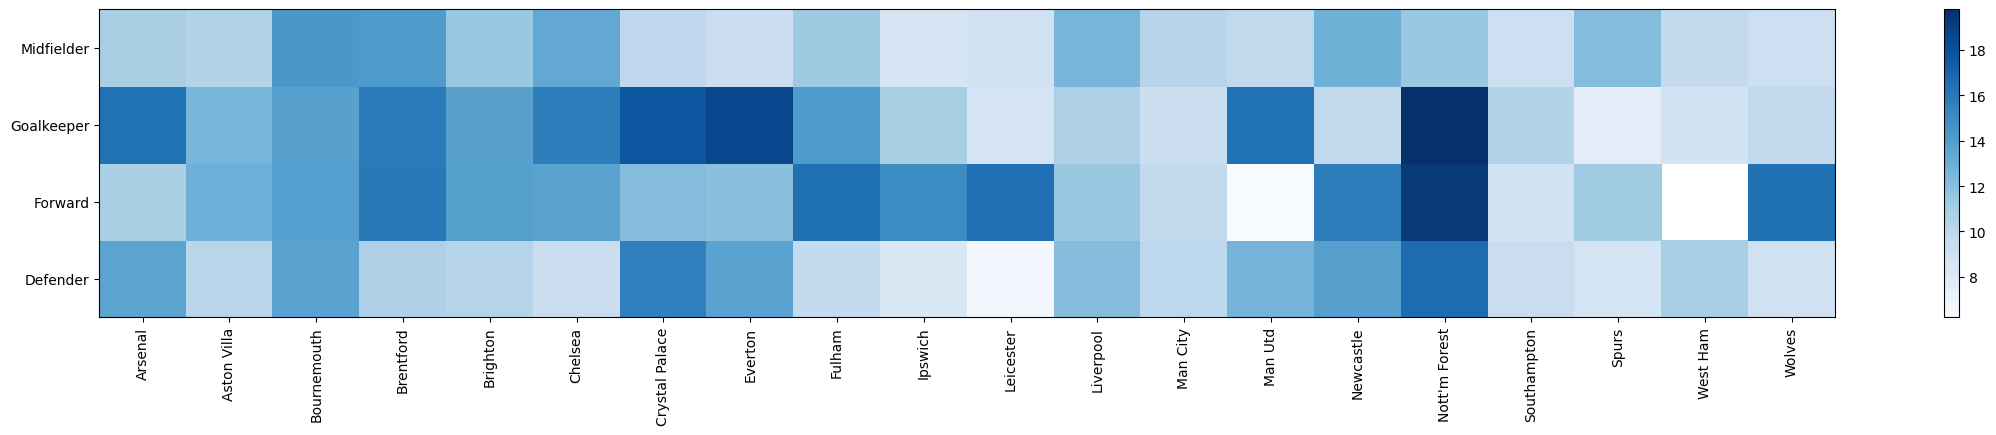

In [35]:
fig, ax = plt.subplots(figsize=(28, 4))
im = ax.pcolor(pivoted_data, cmap='Blues')

#label names
row_labels = pivoted_data.columns.levels[1]
col_labels = pivoted_data.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivoted_data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivoted_data.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [36]:
top_10_gk = data[data['position'] == 'Goalkeeper'].nlargest(10, 'points_per_mills')[['web_name', 'team', 'position', 'now_cost', 'total_points', 'points_per_game', 'points_per_mills', 'goals_scored', 'assists', 'clean_sheets', 'influence', 'creativity', 'threat']]
top_10_df = data[data['position'] == 'Defender'].nlargest(10, 'points_per_mills')[['web_name', 'team', 'position', 'now_cost', 'total_points', 'points_per_game', 'points_per_mills', 'goals_scored', 'assists', 'clean_sheets', 'influence', 'creativity', 'threat']]
top_10_mf = data[data['position'] == 'Midfielder'].nlargest(10, 'points_per_mills')[['web_name', 'team', 'position', 'now_cost', 'total_points', 'points_per_game', 'points_per_mills', 'goals_scored', 'assists', 'clean_sheets', 'influence', 'creativity', 'threat']]
top_10_fw = data[data['position'] == 'Forward'].nlargest(10, 'points_per_mills')[['web_name', 'team', 'position', 'now_cost', 'total_points', 'points_per_game', 'points_per_mills', 'goals_scored', 'assists', 'clean_sheets', 'influence', 'creativity', 'threat']]

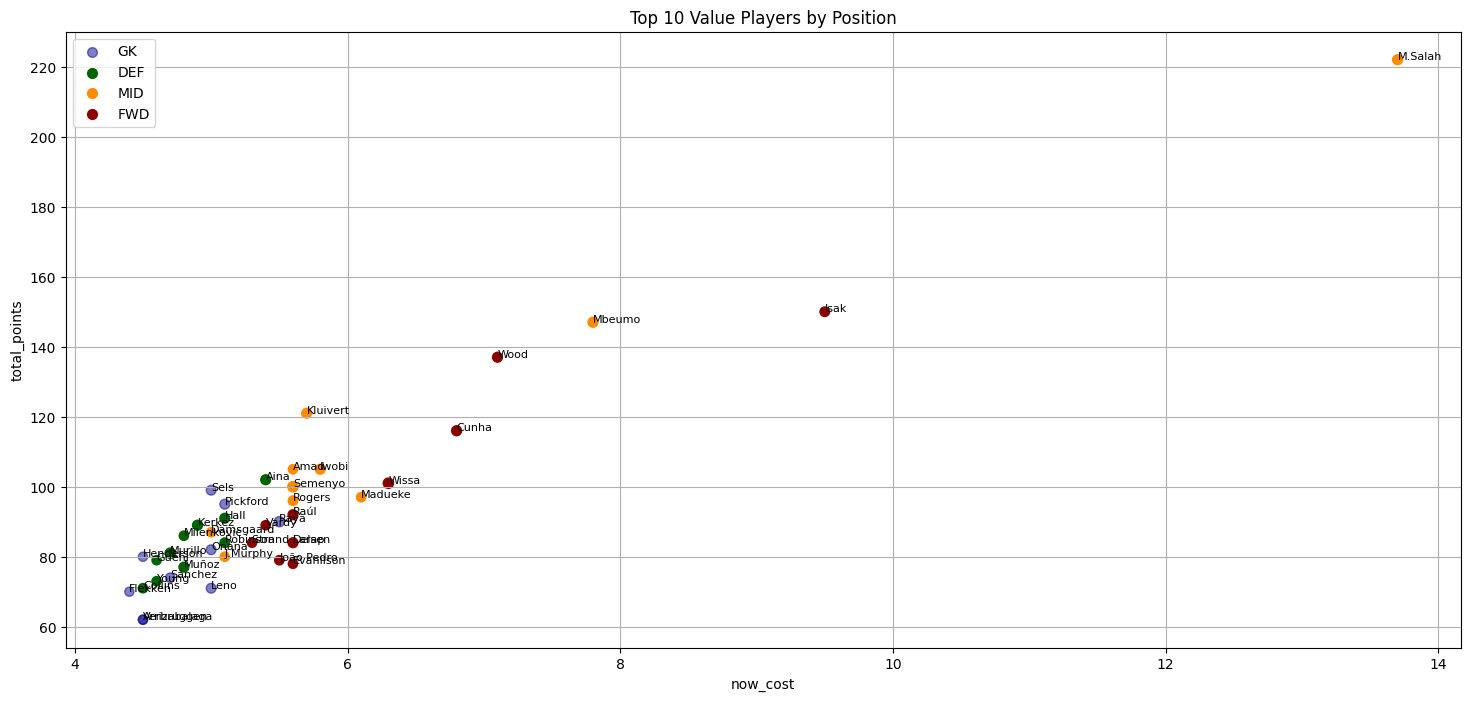

In [66]:
ax = top_10_gk.plot.scatter(x='now_cost', y='total_points', color='DarkBlue', label='GK', s=top_10_gk['now_cost']*10, alpha=.5, figsize=(18, 8), title="Top 10 Value Players by Position", grid=True)
for i, txt in enumerate(top_10_gk.web_name):
    ax.annotate(txt, (top_10_gk.now_cost.iat[i],top_10_gk.total_points.iat[i]), fontsize=8)
    
top_10_df.plot.scatter(x='now_cost', y='total_points', color='DarkGreen', label='DEF', s=top_10_gk['now_cost']*10, ax=ax, grid=True)
for i, txt in enumerate(top_10_df.web_name):
    ax.annotate(txt, (top_10_df.now_cost.iat[i],top_10_df.total_points.iat[i]), fontsize=8)
    
top_10_mf.plot.scatter(x='now_cost', y='total_points', color='DarkOrange', label='MID', s=top_10_gk['now_cost']*10, ax=ax, grid=True)
for i, txt in enumerate(top_10_mf.web_name):
    ax.annotate(txt, (top_10_mf.now_cost.iat[i],top_10_mf.total_points.iat[i]), fontsize=8)
    
top_10_fw.plot.scatter(x='now_cost', y='total_points', color='DarkRed', label='FWD', s=top_10_gk['now_cost']*10, ax=ax, grid=True)
for i, txt in enumerate(top_10_fw.web_name):
    ax.annotate(txt, (top_10_fw.now_cost.iat[i],top_10_fw.total_points.iat[i]), fontsize=8)

In [38]:
for param in ['clean_sheets', 'influence', 'creativity', 'threat']:
    pearson_coef, p_value = stats.pearsonr(top_10_gk[param], top_10_gk['total_points'])
    print(param)
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)

clean_sheets
The Pearson Correlation Coefficient for clean_sheets is 0.8596773809281766 with a P-value of P = 0.0014269849598467605
influence
The Pearson Correlation Coefficient for influence is -0.013433831930332124 with a P-value of P = 0.9706187953976919
creativity
The Pearson Correlation Coefficient for creativity is -0.1464381114839991 with a P-value of P = 0.6864479665132973
threat
The Pearson Correlation Coefficient for threat is 0.040389619586100975 with a P-value of P = 0.9117916971192603


In [39]:
top_10_gk['value_clean_sheets'] = top_10_gk['points_per_mills'] * top_10_gk['clean_sheets']
top_10_gk.sort_values('value_clean_sheets', ascending=False)

,web_name,team,position,now_cost,total_points,points_per_game,points_per_mills,goals_scored,assists,clean_sheets,influence,creativity,threat,value_clean_sheets
269,Sels,Nott'm Forest,Goalkeeper,5.0,99,4.3,19.800000,0,1,9,554.6,0.1,0.0,178.200000
60,Pickford,Everton,Goalkeeper,5.1,95,4.3,18.627451,0,0,8,608.6,10.3,0.0,149.019608
320,Raya,Arsenal,Goalkeeper,5.5,90,3.9,16.363636,0,0,8,476.8,0.0,0.0,130.909091
220,Onana,Man Utd,Goalkeeper,5.0,82,3.6,16.400000,0,0,7,495.2,13.0,0.0,114.800000
509,Henderson,Crystal Palace,Goalkeeper,4.5,80,3.5,17.777778,0,0,6,526.0,10.0,4.0,106.666667
356,Arrizabalaga,Bournemouth,Goalkeeper,4.5,62,3.9,13.777778,0,0,5,429.4,10.1,0.0,68.888889
370,Sánchez,Chelsea,Goalkeeper,4.7,74,3.5,15.744681,0,0,4,554.6,0.0,0.0,62.978723
150,Leno,Fulham,Goalkeeper,5.0,71,3.1,14.200000,0,1,4,554.2,10.0,0.0,56.800000
31,Verbruggen,Brighton,Goalkeeper,4.5,62,3.0,13.777778,0,0,4,516.0,0.0,0.0,55.111111
470,Flekken,Brentford,Goalkeeper,4.4,70,3.0,15.909091,0,1,2,865.0,10.1,0.0,31.818182


In [70]:
avg_cost_points_position[avg_cost_points_position['position'] == 'Goalkeeper']

,position,avg_cost,avg_points,points_per_millions,players,budget
2,Goalkeeper,4.765,62.55,13.126967,2,14.313269


Dengan budget 14 juta, kita bisa pilih 2 goalkeeper teratas, Sels dan Pickford, dengan total 10.1 juta. 

In [43]:
for param in ['clean_sheets', 'influence', 'creativity', 'threat']:
    pearson_coef, p_value = stats.pearsonr(top_10_df[param], top_10_df['total_points'])
    print(param)
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)

clean_sheets
The Pearson Correlation Coefficient for clean_sheets is 0.5984714923529502 with a P-value of P = 0.06756827945825751
influence
The Pearson Correlation Coefficient for influence is -0.3346216836105277 with a P-value of P = 0.3446170193503018
creativity
The Pearson Correlation Coefficient for creativity is 0.1314761289208828 with a P-value of P = 0.7173161330962605
threat
The Pearson Correlation Coefficient for threat is -0.36032965161566244 with a P-value of P = 0.30639338664925975


In [44]:
top_10_df['value_clean_sheets'] = top_10_df['points_per_mills'] * top_10_df['clean_sheets']
top_10_df.sort_values('value_clean_sheets', ascending=False)

,web_name,team,position,now_cost,total_points,points_per_game,points_per_mills,goals_scored,assists,clean_sheets,influence,creativity,threat,value_clean_sheets
256,Aina,Nott'm Forest,Defender,5.4,102,4.4,18.888889,2,1,9,417.8,160.8,63.0,170.000000
274,Milenkovic,Nott'm Forest,Defender,4.8,86,3.9,17.916667,2,1,9,404.0,49.8,235.0,161.250000
237,Hall,Newcastle,Defender,5.1,91,4.0,17.843137,0,5,8,445.0,472.0,122.0,142.745098
266,Murillo,Nott'm Forest,Defender,4.7,81,3.7,17.234043,1,0,8,559.0,138.3,140.0,137.872340
62,Young,Everton,Defender,4.6,73,3.8,15.869565,1,3,7,347.2,263.2,35.0,111.086957
344,Kerkez,Bournemouth,Defender,4.9,89,3.9,18.163265,2,3,6,439.6,369.4,129.0,108.979592
508,Guéhi,Crystal Palace,Defender,4.6,79,3.6,17.173913,3,1,6,584.2,115.0,151.0,103.043478
515,Muñoz,Crystal Palace,Defender,4.8,77,3.5,16.041667,2,3,6,466.6,395.0,316.0,96.250000
155,Robinson,Fulham,Defender,5.1,84,3.7,16.470588,0,9,4,639.4,540.5,160.0,65.882353
468,Collins,Brentford,Defender,4.5,71,3.1,15.777778,2,5,3,637.6,111.1,225.0,47.333333


In [71]:
avg_cost_points_position[avg_cost_points_position['position'] == 'Defender']

,position,avg_cost,avg_points,points_per_millions,players,budget
0,Defender,4.69875,53.4375,11.372706,4,24.800943


Ada 3 defender dari Nott'm Forest di top 4, namun kita pilih Aina karena kuota pemain 1 tim hanya 3. Dengan Sels dipilih sebagai goalkeeper maka tinggal 1 kuota lagi yang bisa digunakan untuk posisi lain.

In [45]:
for param in ['clean_sheets', 'influence', 'creativity', 'threat']:
    pearson_coef, p_value = stats.pearsonr(top_10_mf[param], top_10_mf['total_points'])
    print(param)
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)

clean_sheets
The Pearson Correlation Coefficient for clean_sheets is 0.4439241493675909 with a P-value of P = 0.19872003157011975
influence
The Pearson Correlation Coefficient for influence is 0.9647315216358703 with a P-value of P = 6.4867163402897645e-06
creativity
The Pearson Correlation Coefficient for creativity is 0.5849966965327849 with a P-value of P = 0.07565823610282534
threat
The Pearson Correlation Coefficient for threat is 0.8348533664360265 with a P-value of P = 0.0026527030862932236


In [46]:
top_10_mf['value_creat_threat'] = top_10_mf['points_per_mills'] * (top_10_mf['creativity'] + top_10_mf['threat'])
top_10_mf.sort_values('value_creat_threat', ascending=False)

,web_name,team,position,now_cost,total_points,points_per_game,points_per_mills,goals_scored,assists,clean_sheets,influence,creativity,threat,value_creat_threat
143,M.Salah,Liverpool,Midfielder,13.7,222,10.1,16.204380,19,13,9,1035.0,666.4,1350.0,32674.510949
477,Mbeumo,Brentford,Midfielder,7.8,147,6.4,18.846154,14,3,4,800.6,679.3,612.0,24336.038462
349,Semenyo,Bournemouth,Midfielder,5.6,100,4.5,17.857143,7,4,7,490.4,406.7,802.0,21583.928571
149,Iwobi,Fulham,Midfielder,5.8,105,4.6,18.103448,7,3,5,566.4,634.5,496.0,20465.948276
345,Kluivert,Bournemouth,Midfielder,5.7,121,5.5,21.228070,11,4,10,546.2,351.1,552.0,19171.070175
204,Amad,Man Utd,Midfielder,5.6,105,5.0,18.750000,6,7,6,504.0,474.0,454.0,17400.000000
363,Madueke,Chelsea,Midfielder,6.1,97,4.6,15.901639,7,4,3,404.4,305.2,789.0,17399.573770
469,Damsgaard,Brentford,Midfielder,5.0,87,3.8,17.400000,2,7,6,489.8,575.3,231.0,14029.620000
18,Rogers,Aston Villa,Midfielder,5.6,96,4.4,17.142857,6,5,4,416.4,407.1,393.0,13716.000000
239,J.Murphy,Newcastle,Midfielder,5.1,80,4.0,15.686275,3,8,6,360.4,373.5,252.0,9811.764706


In [72]:
avg_cost_points_position[avg_cost_points_position['position'] == 'Midfielder']

,position,avg_cost,avg_points,points_per_millions,players,budget
3,Midfielder,5.786139,65.019802,11.237166,5,30.631709


Dengan budget yang ada, pilihan sebenarnya ada di Mbeumo, Semenyo, Iwobi, Kluivert dan Amad. Namun dengan sisa budget dari goalkeeper dan defender bisa digunakan sebagai tambahan untuk mengganti Amad dengan M.Salah yang merupakan top midfielder.

In [47]:
for param in ['clean_sheets', 'influence', 'creativity', 'threat']:
    pearson_coef, p_value = stats.pearsonr(top_10_fw[param], top_10_fw['total_points'])
    print(param)
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)

clean_sheets
The Pearson Correlation Coefficient for clean_sheets is 0.4408081948212904 with a P-value of P = 0.20226663851485294
influence
The Pearson Correlation Coefficient for influence is 0.9400938451362414 with a P-value of P = 5.2395763858458205e-05
creativity
The Pearson Correlation Coefficient for creativity is 0.4977860000908792 with a P-value of P = 0.14316552619020342
threat
The Pearson Correlation Coefficient for threat is 0.7265486568892044 with a P-value of P = 0.01731410580035819


In [48]:
top_10_fw['value_threat'] = top_10_fw['points_per_mills'] * top_10_fw['threat']
top_10_fw.sort_values('value_threat', ascending=False)

,web_name,team,position,now_cost,total_points,points_per_game,points_per_mills,goals_scored,assists,clean_sheets,influence,creativity,threat,value_threat
238,Isak,Newcastle,Forward,9.5,150,7.1,15.789474,17,5,7,790.0,440.8,893.0,14100.000000
271,Wood,Nott'm Forest,Forward,7.1,137,6.0,19.295775,14,2,10,556.6,164.8,563.0,10863.521127
153,Raúl,Fulham,Forward,5.6,92,4.0,16.428571,8,2,6,383.2,189.1,630.0,10350.000000
441,Cunha,Wolves,Forward,6.8,116,5.3,17.058824,10,4,3,630.0,550.9,573.0,9774.705882
486,Wissa,Brentford,Forward,6.3,101,5.0,16.031746,10,3,4,469.2,221.7,599.0,9603.015873
456,Strand Larsen,Wolves,Forward,5.3,84,3.7,15.849057,7,2,4,360.2,195.7,560.0,8875.471698
119,Vardy,Leicester,Forward,5.4,89,4.2,16.481481,7,4,1,356.6,181.7,511.0,8422.037037
462,Evanilson,Bournemouth,Forward,5.6,78,4.1,13.928571,5,4,8,243.6,202.1,573.0,7981.071429
77,Delap,Ipswich,Forward,5.6,84,3.8,15.000000,8,2,3,351.6,213.5,471.0,7065.000000
502,João Pedro,Brighton,Forward,5.5,79,4.6,14.363636,5,5,5,342.2,262.4,422.0,6061.454545


In [73]:
avg_cost_points_position[avg_cost_points_position['position'] == 'Forward']

,position,avg_cost,avg_points,points_per_millions,players,budget
1,Forward,6.940909,91.454545,13.176162,4,28.733819


Untuk forward pilihannya Isak, Wood, Cunha dan Wissa yang mempunyai points per game tertinggi.

In [49]:

lineups = data[(data['web_name'].isin(['Pickford', 'Sels', 'Aina', 'Kerkez', 'Hall', 'Guéhi', 'Kluivert', 'Mbeumo', 'Semenyo', 'Iwobi', 'M.Salah', 'Wood', 'Isak', 'Cunha', 'Wissa'])) & (~data['first_name'].isin(['Nathan', 'Emiliano']))][['web_name', 'first_name', 'team', 'position', 'total_points', 'now_cost', 'form']]
sort = {'Goalkeeper': 0, 'Defender': 1, 'Midfielder': 2, 'Forward': 3}
lineups.sort_values(by=['position'], key=lambda x: x.map(sort))

,web_name,first_name,team,position,total_points,now_cost,form
60,Pickford,Jordan,Everton,Goalkeeper,95,5.1,3.0
269,Sels,Matz,Nott'm Forest,Goalkeeper,99,5.0,3.5
237,Hall,Lewis,Newcastle,Defender,91,5.1,5.2
256,Aina,Ola,Nott'm Forest,Defender,102,5.4,3.2
344,Kerkez,Milos,Bournemouth,Defender,89,4.9,6.5
508,Guéhi,Marc,Crystal Palace,Defender,79,4.6,6.5
143,M.Salah,Mohamed,Liverpool,Midfielder,222,13.7,5.0
149,Iwobi,Alex,Fulham,Midfielder,105,5.8,5.0
345,Kluivert,Justin,Bournemouth,Midfielder,121,5.7,11.5
349,Semenyo,Antoine,Bournemouth,Midfielder,100,5.6,7.2


In [51]:
lineups.groupby('position')['position'].count()

position
Defender      4
Forward       4
Goalkeeper    2
Midfielder    5
Name: position, dtype: int64

In [52]:
lineups.groupby('team')['team'].count()

team
Bournemouth       3
Brentford         2
Crystal Palace    1
Everton           1
Fulham            1
Liverpool         1
Newcastle         2
Nott'm Forest     3
Wolves            1
Name: team, dtype: int64

In [74]:
print(f'total cost : ', lineups['now_cost'].sum())

total cost :  98.39999999999998


### Conclusions
- Jumlah menit bermain dan starter berkorelasi positif pada poin.
- Jumlah gol, asisst, clean sheet berkorelasi positif pada poin, sesuai dengan penjelasan di website Fantasy Premier League, bahwa gol, assist, clean sheet adalah penghasil poin.
- Kartu kuning dan kartu merah tidak menunjukkan korelasi yang kuat pada poin.
- Poin yang diperoleh pemain pada suatu gameweek tidak menjadikan penentu utama pemilihan dream team.
- Secara keseluruan, posisi forward mempunyai figure poin tertinggi, hal ini menunjukkan semakin dekat posisi  ke gawang lawan, semakin tinggi perolehan poinnya. 
- Meskipun midfielder mempunyai poin maksimal yang tinggi, minimal poinnya lebih rendah dibandingkan forward dan sedikit lebih tinggi dari minimal poin defender. Menunjukkan variasi peran midfielder, bertahan atau lebih condong menyerang sehingga menghasilkan poin lebih banyak.
- 